# Plato tutorial notebook

In this notebook, we give a basic overview of several of the key features of [plato](https://plato-draw.readthedocs.io). 

## Primitives and Scenes

Briefly, plato mostly concerns itself with rendering collections of objects, which are called *primitives*. Primitives may have per-object quantities associated with them (for example, each sphere in a collection of spheres can have its own position and color), or common values for the entire primitive (like the list of vertices or rounding radius for convex spheropolyhedra).

Once primitives have been set up with values detailing each object that should be displayed, they are actually shown or saved by using a `Scene` object. Scenes handle displaying the resulting image and any interactive capabilities that the associated backend exposes.

In [1]:
import plato
import numpy as np

/usr/lib/python3.7/site-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)
/usr/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())
/usr/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


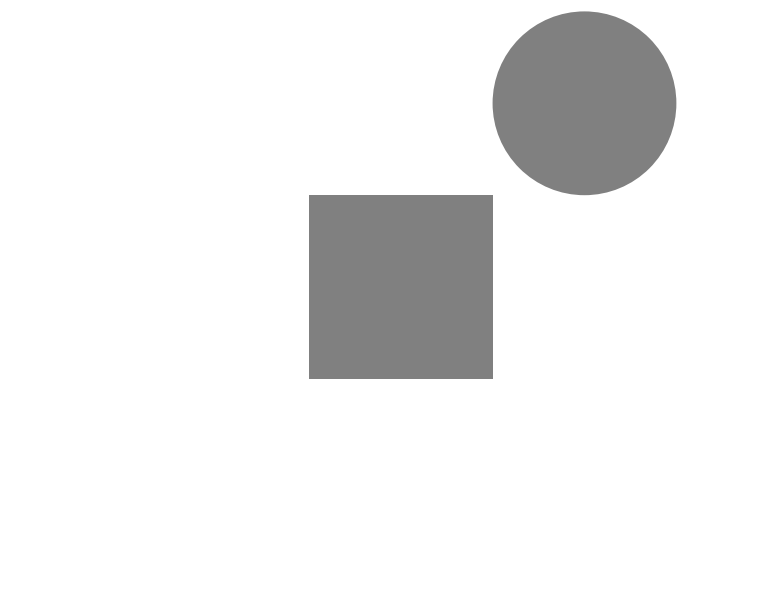

In [2]:
%matplotlib inline
import plato.draw.matplotlib as draw

square = draw.Polygons(vertices=[(1, 1), (-1, 1), (-1, -1), (1, -1)])
circle = draw.Disks(positions=[(2, 2)], diameters=2)

scene = draw.Scene([square, circle], zoom=5)
scene.show()

Primitive attributes can be set in the constructor (as seen above), or after they have been constructed, as shown below.

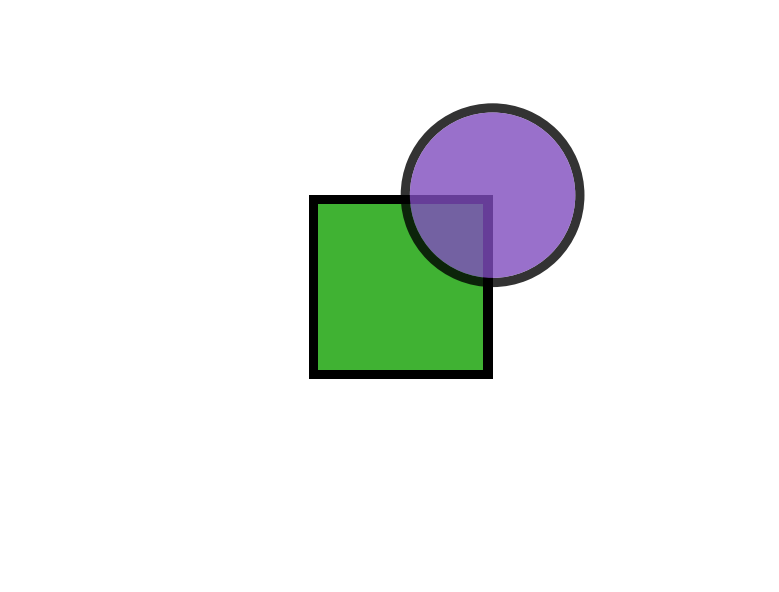

In [3]:
# colors are (red, green, blue, alpha); alpha controls how opaque a shape is
square.colors = (.25, .7, .2, 1)

circle.colors = (.5, .3, .75, .8)
circle.positions = (1, 1)

# the primitives within a Scene object can be iterated over
for primitive in scene:
    primitive.outline = .1
    
scene.show()

## Backends

Due to the wide variety of tasks, outputs, capabilities, and use cases we anticipate plato being used for, it supports several different *rendering backends*, each of which has its own set of supported features, rendering style, output formats, dependencies, and capabilities.

Base classes for `Scene` and the various primitive classes are placed directly in the module `plato.draw`. Objects in this module are simple containers of values that can't directly be used to produce graphics. There are several submodules of `plato.draw`, however, that each correspond to a different backend. The structure of each of these backend submodules mirrors that of `plato.draw`, each with its own `Scene` class and the set of primitives that it supports. Currently-implemented backends (and their dominant characteristics) include:

- `vispy`: Simple openGL-backed 2D and 3D visualizations. Supports interactive visualization on the desktop (*via* pyside2 or pyglet, for example) and in jupyter notebooks, as well as saving rendered results on the desktop.
- `matplotlib`: Primarily static 2D visualizations. Displays results inline in notebooks and can save in a wide variety of rasterized and vector formats.
- `pythreejs`: Live 3D notebook-based visualizations.
- `povray`: Static 3D raytraced images.
- `fresnel`: Primarily 3D raytraced images, with optional GPU support.

Here, we will demonstrate arranging a scene using the live `pythreejs` backend and then saving a high-quality raytraced version using `povray`. We do this via the `Scene.convert()` function, which takes as an argument the backend submodule to convert the scene into.

In [4]:
import plato.draw.pythreejs as draw

Ns = np.arange(128)
rs = np.sqrt(Ns)
thetas = Ns*(3 - np.sqrt(5))*np.pi

xs = rs*np.cos(thetas)
ys = rs*np.sin(thetas)
zs = -10*np.exp(-Ns/20)

positions = np.array([xs, ys, zs]).T
colors = np.ones((len(Ns), 4))
colors[:, :3] = plato.cmap.cubeellipse(np.arctan2(ys, xs), h=1.5)
diameters = np.ones(len(Ns))*4

prim = draw.Spheres(positions=positions, colors=colors, diameters=diameters)
scene = draw.Scene(prim, translation=(0, 0, 0))

scene.show()

Renderer(camera=OrthographicCamera(bottom=-15.0, children=(DirectionalLight(intensity=0.692820323027551, posit…

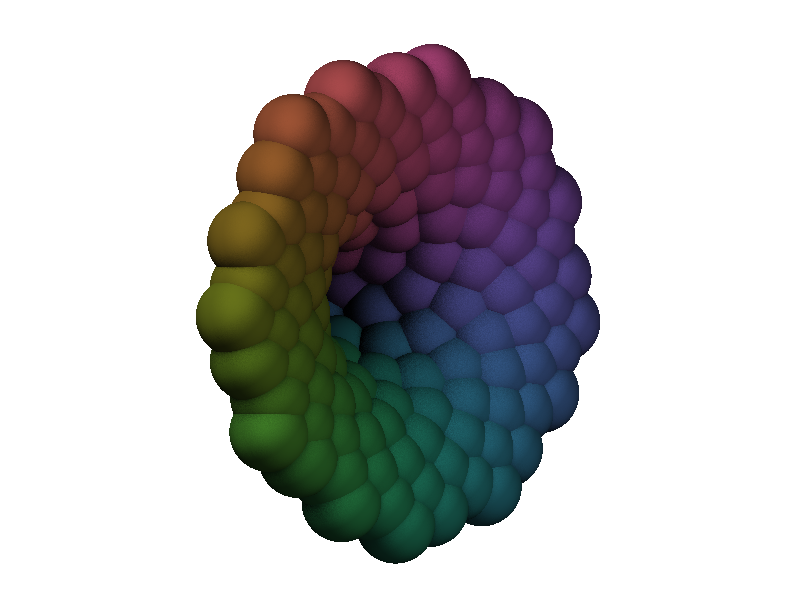

In [5]:
import plato.draw.povray as draw

scene = scene.convert(draw)
scene.show()

Different backends also support different *rendering features*, which control aspects of the rendering process that may be backend-specific. For example, the 3D backends support configuring lighting of the scene via the `directional_light` feature. While the lights work roughly the same in most backends, it may be useful to fine-tune details at times. We can brighten the povray rendering of the above scene by adding an additional light (pointing directly into the screen for this example).

In [6]:
config = scene.get_feature_config('directional_light')
lights = list(config['value'])
lights

[[0.4, -0.4, -0.4], [-0.25, -0.0625, -0.25], [0, 0.125, -0.125]]

/home/matthew/dev/plato/plato/draw/povray/Scene.py:103: RuntimeWarning: invalid value encountered in true_divide
  cross /= np.linalg.norm(cross)


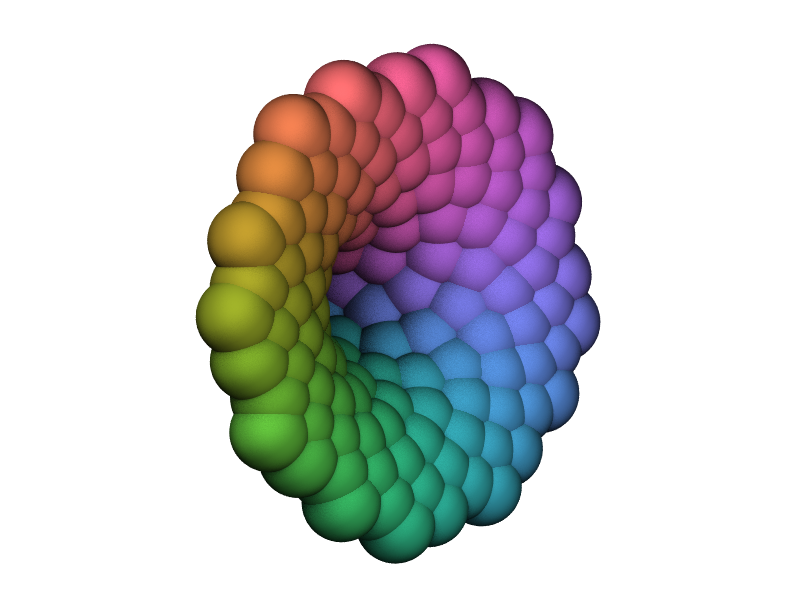

In [7]:
# as detailed in the Scene documentation, each light is specified 
# as a magnitude*unit vector. We can weaken or strengthen this light
# by decreasing or increasing the length of the vector.
lights.append((0, 0, -.5))
scene.enable('directional_light', lights)

# several backends enable higher-quality renderings via antialiasing
scene.enable('antialiasing')

scene.show()